## An example for using Cobweb-Symbolic

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from cobweb_symbolic import CobwebSymbolic
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import untils

torch.Size([1, 1, 28, 28]) tensor([6])


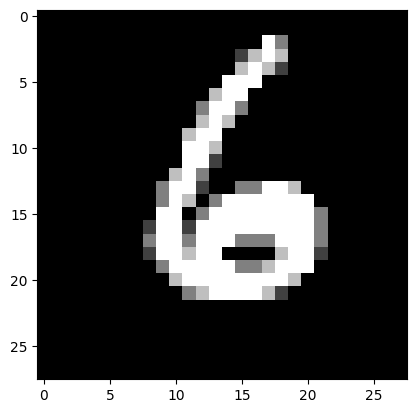

In [3]:
download = True
dataset_class = datasets.MNIST
mnist_transform = [transforms.ToTensor()]
# add normalization to the transform list such that all values are strictly greater than 0
# mnist_transform.append(transforms.Lambda(lambda x: x + 1e-5))
# normalize the data
mnist_transform.append(transforms.Normalize((0.1307,), (0.3081,)))

dataset_transform = transforms.Compose(mnist_transform)
mnist_train = dataset_class('data/MNIST', train=True, download=download, transform=dataset_transform)
mnist_test = dataset_class('data/MNIST', train=False, download=download, transform=dataset_transform)

mnist_train_loader = DataLoader(mnist_train, batch_size=1, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=1, shuffle=True)

# test the dataloader
for i, (data, target) in enumerate(mnist_train_loader):
    print(data.shape, target)
    # print(data)
    # display the first image
    plt.imshow(data[0, 0].numpy(), cmap='gray')
    plt.show()
    break

# randonly shuffle the training data
mnist_train_loader = DataLoader(mnist_train, batch_size=8, shuffle=True)

In [4]:
hard = [4,5,7,9]
super_easy = [3, 5]
easy = [0,1,2,3]
longer = [0,1,2,3,4,5,6,7]
random_digit = [1, 4, 6, 8]
all_labels = list(range(10))

split = easy

mnist_01_train = untils.filter_by_label(mnist_train, split, rename_labels=True)
mnist_01_test = untils.filter_by_label(mnist_test, split, rename_labels=True)

100%|██████████| 10000/10000 [00:00<00:00, 40232.55it/s]


In [5]:
cobweb_symbolic = CobwebSymbolic(input_dim=28*28, depth=4)
cobweb_symbolic.train(mnist_01_train, epochs=1)

  0%|          | 0/24754 [00:00<?, ?it/s]

100%|██████████| 24754/24754 [00:01<00:00, 14503.15it/s]


In [6]:
# save the model to json
cobweb_symbolic.save_tree_to_json('cobweb_symbolic.json')

In [7]:
# load the model from json
### NOW THE TREE IN cobweb_symbolic WILL BE REPLACED BY THE TREE IN THE JSON FILE
### THIS IS NOT A C++ OBJECT ANYMORE
### THIS IS NOW A PYTHON DICT OBJECT

cobweb_symbolic.load_tree_in_torch('cobweb_symbolic.json')
print(cobweb_symbolic.tree.keys())
print(type(cobweb_symbolic.tree['mean']))

dict_keys(['node_id', 'mean', 'count', 'sum_sq', 'children', 'logvar'])
<class 'torch.Tensor'>


In [ ]:
## Visualize the tree
## MUST LOAD FROM A JSON FILE FIRST
## Change the filename at line 55 in tree.viz.html
cobweb_symbolic.viz_cobweb_tree('cobweb_symbolic_viz')

/Users/zwang910/Documents/Research/unsupervised-prototypes/cobweb_symbolic.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  curr["image"] = self.tensor_to_base64(torch.tensor(curr["mean"]), (28, 28), cmap="inferno", normalize=True)


In [ ]:
print(cobweb_symbolic.tree.keys())

dict_keys(['node_id', 'mean', 'count', 'sum_sq', 'children', 'logvar'])
